In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import f

In [3]:
# Read in data into memory
csvs = [x for x in os.listdir() if ".csv" in x]

d = {}
for file in csvs:
    file_str = file.replace(".csv","").replace("-","_")
    try:
        d[file_str] = pd.read_csv(file)
    except:
        print("{0} requires unicode_escaping".format(file))
        d[file_str] = pd.read_csv(file, encoding='unicode_escape', low_memory = False)

london_infrastructure_spending.csv requires unicode_escaping
london_tickets_for_sale.csv requires unicode_escaping


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
london_underground_activity = d['london_underground_activity']
london_underground_activity.head()

,year,nlc,station,area,weekday_entry,weekday_exit,saturday_entry,saturday_exit,sunday_entry,sunday_exit,annual_entry_and_exit
0,2007,500,Acton Town,Ealing,9205,8899.0,6722,6320,4427,4304,5.77
1,2007,502,Aldgate,City of London,9887,10397.0,2191,2587,1484,1772,5.57
2,2007,503,Aldgate East,Tower Hamlets,12820,12271.0,7040,6220,5505,5000,7.66
3,2007,505,Alperton,Brent,4611,4719.0,3354,3450,2433,2503,3.01
4,2007,506,Amersham,Chiltern,4182,3938.0,1709,1585,1004,957,2.34


In [5]:
Areas = london_underground_activity["area"].unique()
Olympic_Areas = np.array(['Barking and Dagenham', 'Greenwich', 'Hackney', 'Newham', 'Tower Hamlets', 'Waltham Forest'])
Non_Olympic_Areas = Areas[~np.isin(Areas,Olympic_Areas)]

In [6]:
grouped = london_underground_activity.groupby(["area", "year"]).agg({'annual_entry_and_exit':sum})
grouped["annual_entry_and_exit"]["Waltham Forest"]

year
2007    41.680000
2008    42.760000
2009    41.170000
2010    42.200000
2011    44.530000
2012    45.350000
2013    48.490000
2014    51.800000
2015    52.344912
2016    56.850000
2017    43.060000
Name: annual_entry_and_exit, dtype: float64

In [7]:
london_underground_activity[london_underground_activity["area"] == "Greenwich"]

,year,nlc,station,area,weekday_entry,weekday_exit,saturday_entry,saturday_exit,sunday_entry,sunday_exit,annual_entry_and_exit
157,2007,789,North Greenwich,Greenwich,24542,25405.0,25035,27389,15439,17067,17.280000
429,2008,789,North Greenwich,Greenwich,26229,27837.0,22786,23256,14520,14106,17.760000
697,2009,789,North Greenwich,Greenwich,26589,30533.0,17726,20494,13481,14725,18.100000
965,2010,789,North Greenwich,Greenwich,27541,29543.0,17039,18173,11878,12789,17.730000
1233,2011,789,North Greenwich,Greenwich,23982,23714.0,18661,19708,12982,14790,15.700000
1501,2012,789,North Greenwich,Greenwich,34450,37528.0,30255,33877,21166,23340,24.170000
1769,2013,789,North Greenwich,Greenwich,32687,34926.0,26233,28928,19913,21165,22.400000
2037,2014,789,North Greenwich,Greenwich,34350,37376.0,29217,32607,23577,25763,24.270000
2305,2015,789,North Greenwich,Greenwich,36889,40511.0,35100,37282,24951,26422,26.377071
2682,2016,789,North Greenwich,Greenwich,38592,39497.0,36290,37460,24531,23954,26.450000


In [8]:
london_earnings_by_borough = d['london_earnings_by_borough']
london_earnings_by_borough.tail()

,year,area_code,area,identity,pay_type,pay,confidence
6763,2015,926,United Kingdom,Part-Time,Weekly,166.5,0.5
6764,2016,926,United Kingdom,Part-Time,Weekly,177.1,0.5
6765,2017,926,United Kingdom,Part-Time,Weekly,182.0,0.5
6766,2018,926,United Kingdom,Part-Time,Weekly,187.3,0.2
6767,2019,926,United Kingdom,Part-Time,Weekly,196.9,0.3


In [9]:
london_earnings_by_borough.groupby(["year", "area"]).head()

,year,area_code,area,identity,pay_type,pay,confidence
0,2002,00AA,City of London,Female,Hourly,NaN,NaN
1,2003,00AA,City of London,Female,Hourly,NaN,NaN
2,2004,00AA,City of London,Female,Hourly,NaN,NaN
3,2005,00AA,City of London,Female,Hourly,NaN,NaN
4,2006,00AA,City of London,Female,Hourly,NaN,NaN
5,2007,00AA,City of London,Female,Hourly,NaN,NaN
6,2008,00AA,City of London,Female,Hourly,NaN,NaN
7,2009,00AA,City of London,Female,Hourly,17.56,20.0
8,2010,00AA,City of London,Female,Hourly,NaN,NaN
9,2011,00AA,City of London,Female,Hourly,NaN,NaN


In [10]:
london_taxpayer_income = d['london_taxpayer_income']
london_taxpayer_income.head()

,year,area_code,area,population,mean_income,median_income
0,1999-2000,00AA,City of London,10000,109800,40400
1,2000-2001,00AA,City of London,10000,137000,65000
2,2001-2002,00AA,City of London,12000,92900,38300
3,2002-2003,00AA,City of London,11000,78700,37000
4,2003-2004,00AA,City of London,10000,85800,39200


In [11]:
london_sports_participation = d['london_sports_participation']
london_sports_participation.head()

,year,area_code,area,sports_participation,percentage,population
0,2005-2006,A,North East,one+,0.329,687000.0
1,2007-2008,A,North East,one+,0.348,730300.0
2,2008-2009,A,North East,one+,0.354,748600.0
3,2009-2010,A,North East,one+,0.358,760100.0
4,2010-2011,A,North East,one+,0.335,719300.0


In [12]:
years = (list(range(2000, 2009)) + list(range(2010, 2019)))
years = [datetime.strptime(str(x) + " 04 06", "%Y %m %d") for x in years]
years

[datetime.datetime(2000, 4, 6, 0, 0),
 datetime.datetime(2001, 4, 6, 0, 0),
 datetime.datetime(2002, 4, 6, 0, 0),
 datetime.datetime(2003, 4, 6, 0, 0),
 datetime.datetime(2004, 4, 6, 0, 0),
 datetime.datetime(2005, 4, 6, 0, 0),
 datetime.datetime(2006, 4, 6, 0, 0),
 datetime.datetime(2007, 4, 6, 0, 0),
 datetime.datetime(2008, 4, 6, 0, 0),
 datetime.datetime(2010, 4, 6, 0, 0),
 datetime.datetime(2011, 4, 6, 0, 0),
 datetime.datetime(2012, 4, 6, 0, 0),
 datetime.datetime(2013, 4, 6, 0, 0),
 datetime.datetime(2014, 4, 6, 0, 0),
 datetime.datetime(2015, 4, 6, 0, 0),
 datetime.datetime(2016, 4, 6, 0, 0),
 datetime.datetime(2017, 4, 6, 0, 0),
 datetime.datetime(2018, 4, 6, 0, 0)]

In [13]:
c_zone = ['City of London','Camden','Islington','Kensington and Chelsea','Lambeth','Southwark','Westminster']
e_zone = ['Barking and Dagenham','Bexley','Greenwich','Hackney','Havering','Lewisham','Newham','Redbridge','Tower Hamlets','Waltham Forest']
n_zone = ['Barnet','Enfield','Haringey']
s_zone = ['Bromley','Croydon','Merton','Sutton','Wandsworth','Kingston upon Thames']
w_zone = ['Brent','Ealing','Hammersmith and Fulham','Harrow','Richmond upon Thames','Hallingdon','Hounslow']


In [78]:
west = london_taxpayer_income[london_taxpayer_income.area.isin(w_zone)]
east = london_taxpayer_income[london_taxpayer_income.area.isin(e_zone)]
south = london_taxpayer_income[london_taxpayer_income.area.isin(s_zone)]
central = london_taxpayer_income[london_taxpayer_income.area.isin(c_zone)]
north = london_taxpayer_income[london_taxpayer_income.area.isin(n_zone)]
ldn = [west, east, south, central, north]

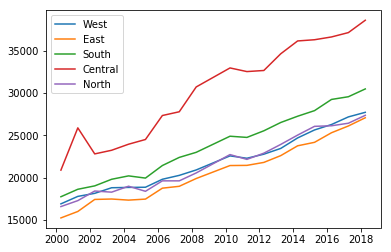

In [18]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
for zone in ldn:
    avg = zone.groupby("year").mean()
    plt.plot(years, avg["median_income"])
plt.legend(['West', 'East', 'South', "Central", 'North'])

In [ ]:
for zone in ldn:
    avg = zone.groupby("year").mean()
    plt.plot(years, avg["median_income"])

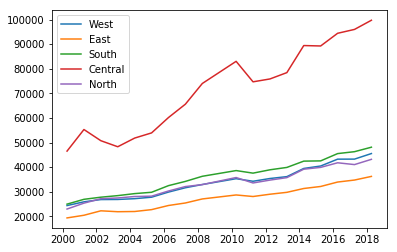

In [19]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
for zone in ldn:
    avg = zone.groupby("year").mean()
    plt.plot(years, avg["mean_income"])
plt.legend(['West', 'East', 'South', "Central", 'North'])

In [20]:
avg = central.groupby("year").mean()
reg_c = LinearRegression().fit(np.array([x.year for x in years]).reshape(-1,1) , avg["median_income"])

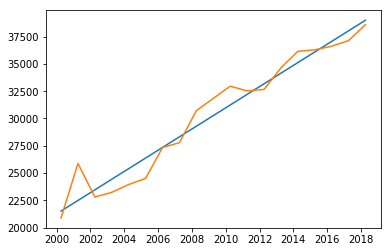

In [21]:
avg = central.groupby("year").mean()
plt.plot(years, reg_c.predict(np.array([x.year for x in years]).reshape(-1,1)))
plt.plot(years, avg["median_income"])

In [22]:
from datetime import datetime
datetime.strptime("2012", "%Y")

datetime.datetime(2012, 1, 1, 0, 0)

In [23]:
borough_by_sector = d['borough_by_sector']

In [24]:
borough_by_sector.head()

,area,year,sector,employee_jobs
0,Barking and Dagenham,1971,Primary & Utilities,1000
1,Barking and Dagenham,1971,Manufacturing,41000
2,Barking and Dagenham,1971,Construction,2250
3,Barking and Dagenham,1971,Wholesale,6000
4,Barking and Dagenham,1971,Retail,6000


In [140]:
l = pd.read_excel("local-units-by-employment-size.xls", sheet_name = None, header = 1)

In [141]:
east = {}
for i in range(2003, 2020):
    l[str(i)]["Area"] = l[str(i)]["Area"].str.strip()
    x = l[str(i)]
    east[i] = x[x.Area.isin(e_zone)]
south = {}
for i in range(2003, 2020):
    l[str(i)]["Area"] = l[str(i)]["Area"].str.strip()
    x = l[str(i)]
    south[i] = x[x.Area.isin(s_zone)]
north = {}
for i in range(2003, 2020):
    l[str(i)]["Area"] = l[str(i)]["Area"].str.strip()
    x = l[str(i)]
    north[i] = x[x.Area.isin(n_zone)]
west = {}
for i in range(2003, 2020):
    l[str(i)]["Area"] = l[str(i)]["Area"].str.strip()
    x = l[str(i)]
    west[i] = x[x.Area.isin(w_zone)]
central = {}
for i in range(2003, 2020):
    l[str(i)]["Area"] = l[str(i)]["Area"].str.strip()
    x = l[str(i)]
    central[i] = x[x.Area.isin(c_zone)]
    

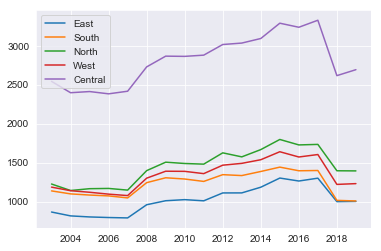

In [142]:
size1 = "5 - 9"
size2 = "5-9"
plt.plot(list(range(2003, 2020)), [east[i].mean()[size1] for i in range(2003, 2014)] + [east[i].mean()[size2] for i in range(2014, 2020)])
plt.plot(list(range(2003, 2020)), [south[i].mean()[size1] for i in range(2003, 2014)] + [south[i].mean()[size2] for i in range(2014, 2020)])
plt.plot(list(range(2003, 2020)), [north[i].mean()[size1] for i in range(2003, 2014)] + [north[i].mean()[size2] for i in range(2014, 2020)])
plt.plot(list(range(2003, 2020)), [west[i].mean()[size1] for i in range(2003, 2014)] + [west[i].mean()[size2] for i in range(2014, 2020)])
plt.plot(list(range(2003, 2020)), [central[i].mean()[size1] for i in range(2003, 2014)] + [central[i].mean()[size2] for i in range(2014, 2020)])
plt.legend(['East', 'South', 'North', 'West', 'Central'])

In [139]:
east[2017]

,Code,Area,0-4,5-9,10-19,20-49,50-99,100-249,250+,Total,Unnamed: 10
2,E09000002,Barking and Dagenham,6295.0,815.0,435.0,260.0,90.0,65.0,15.0,7975.0,NaN
4,E09000004,Bexley,7810.0,1005.0,560.0,365.0,160.0,70.0,30.0,10000.0,NaN
11,E09000011,Greenwich,9205.0,985.0,580.0,415.0,140.0,80.0,30.0,11435.0,NaN
12,E09000012,Hackney,16180.0,1920.0,1135.0,650.0,195.0,95.0,40.0,20215.0,NaN
16,E09000016,Havering,8465.0,1285.0,690.0,375.0,160.0,85.0,35.0,11095.0,NaN
23,E09000023,Lewisham,9125.0,1055.0,490.0,310.0,120.0,65.0,20.0,11185.0,NaN
25,E09000025,Newham,10945.0,1260.0,675.0,450.0,190.0,120.0,45.0,13685.0,NaN
26,E09000026,Redbridge,12230.0,1400.0,670.0,335.0,125.0,80.0,20.0,14860.0,NaN
30,E09000030,Tower Hamlets,14360.0,2130.0,1230.0,805.0,300.0,170.0,140.0,19135.0,NaN
31,E09000031,Waltham Forest,9650.0,1145.0,585.0,320.0,100.0,65.0,20.0,11885.0,NaN


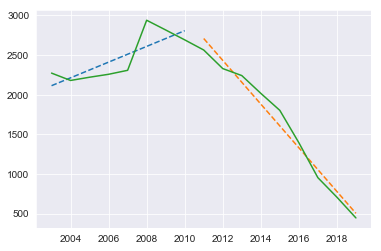

In [129]:
breakpoint = 8
X = np.array([[[i, 0, 0] for i in range(2003, 2011)] + [[i, 1, i] for i in range(2011, 2020)]]).reshape(17, 3)
y = [(south[i].mean()[size1] - east[i].mean()[size1]) for i in range(2003, 2014)] + [(south[i].mean()[size2] - east[i].mean()[size2]) for i in range(2014, 2020)]

reg = LinearRegression().fit(X, y)
reg.score(X, y)

X_n = np.array(list(range(2003, 2020))).reshape(-1, 1)

X_1 = np.array([[i, 0, 0] for i in range(2003, 2011)])
X_2 = np.array([[i, 1, i] for i in range(2011, 2020)])
reg.predict(X_1)
plt.plot(X_n[:breakpoint,0], reg.predict(X_1), "--")
plt.plot(X_n[breakpoint:,0], reg.predict(X_2), "--")


plt.plot(X_n, y)
plt.savefig('1.png', dpi=300)

In [128]:
def rss(y, y_pred):
    return mean_squared_error(y, y_pred)

def chow(y, y_pred_all, y_pred_1, y_pred_2, N, k, breakpoint = 8):
    rss_p = rss(y, y_pred_all)
    rss_1 = rss(y[:breakpoint], reg.predict(X_1))
    rss_2 = rss(y[breakpoint:], reg.predict(X_2))
    num = (rss_p - rss_1 - rss_2)/(k)
    den = (rss_1 + rss_2)/(N-2*k)
    return num/den

reg_all = LinearRegression().fit(X_n, y)
y_pred_all = reg_all.predict(X_n)
y_pred_1 = reg.predict(X_1)
y_pred_2 =  reg.predict(X_2)

print(chow(y, y_pred_all, y_pred_1, y_pred_2, 17, 2))
f.ppf(0.95,2,13)

28.325631985394338


3.805565252978057

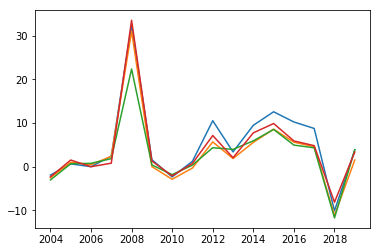

In [46]:
plt.plot(list(range(2004, 2020)), returns([east[i].mean()[size1] for i in range(2003, 2014)] + [east[i].mean()[size2] for i in range(2014, 2020)]))
plt.plot(list(range(2004, 2020)), returns([south[i].mean()[size1] for i in range(2003, 2014)] + [south[i].mean()[size2] for i in range(2014, 2020)]))
plt.plot(list(range(2004, 2020)), returns([central[i].mean()[size1] for i in range(2003, 2014)] + [central[i].mean()[size2] for i in range(2014, 2020)]))
plt.plot(list(range(2004, 2020)), returns([north[i].mean()[size1] for i in range(2003, 2014)] + [north[i].mean()[size2] for i in range(2014, 2020)]))

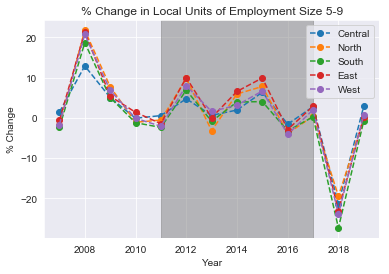

In [143]:
plt.figure()
import seaborn as sns
sns.set_style('darkgrid') 
plt.plot(range(2007,2020),returns([central[i].mean()[size1] for i in range(2006, 2014)] + [central[i].mean()[size2] for i in range(2014, 2020)]),'--o') # assuming jobs_plotting is my dataset
plt.plot(range(2007,2020),returns([north[i].mean()[size1] for i in range(2006, 2014)] + [north[i].mean()[size2] for i in range(2014, 2020)]),'--o')
plt.plot(range(2007,2020),returns([south[i].mean()[size1] for i in range(2006, 2014)] + [south[i].mean()[size2] for i in range(2014, 2020)]),'--o')
plt.plot(range(2007,2020),returns([east[i].mean()[size1] for i in range(2006, 2014)] + [east[i].mean()[size2] for i in range(2014, 2020)]),'--o')
plt.plot(range(2007,2020),returns([west[i].mean()[size1] for i in range(2006, 2014)] + [west[i].mean()[size2] for i in range(2014, 2020)]),'--o')
plt.legend(['Central','North','South','East','West'],loc=1) # loc just specifies the location of legend (1,2,3,4 are similar to quadrant position)
ax = plt.gca()
ax.axvspan(2011, 2017, alpha=0.5, color='grey')
ax.set_xlabel('Year')
ax.set_ylabel('% Change')
ax.set_title('% Change in Local Units of Employment Size 5-9')
plt.savefig('LU59.png', dpi=300)

In [62]:
l = pd.read_excel("enterprises-by-employment-size.xls", sheet_name = None, header = 2)

In [63]:
east = {}
for i in range(2010, 2020):
    l[str(i)]["Area"] = l[str(i)]["Area"].str.strip()
    x = l[str(i)]
    east[i] = x[x.Area.isin(e_zone)]
south = {}
for i in range(2010, 2020):
    l[str(i)]["Area"] = l[str(i)]["Area"].str.strip()
    x = l[str(i)]
    south[i] = x[x.Area.isin(s_zone)]
north = {}
for i in range(2010, 2020):
    l[str(i)]["Area"] = l[str(i)]["Area"].str.strip()
    x = l[str(i)]
    north[i] = x[x.Area.isin(n_zone)]
west = {}
for i in range(2010, 2020):
    l[str(i)]["Area"] = l[str(i)]["Area"].str.strip()
    x = l[str(i)]
    west[i] = x[x.Area.isin(w_zone)]
central = {}
for i in range(2010, 2020):
    l[str(i)]["Area"] = l[str(i)]["Area"].str.strip()
    x = l[str(i)]
    central[i] = x[x.Area.isin(c_zone)]

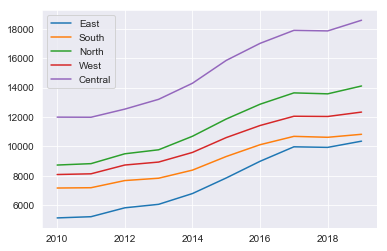

In [64]:
size1 = "0 to 4"
size2 = "0 to 4"
plt.plot(list(range(2010, 2020)), [east[i].mean()[size1] for i in range(2010, 2014)] + [east[i].mean()[size2] for i in range(2014, 2020)])
plt.plot(list(range(2010, 2020)), [south[i].mean()[size1] for i in range(2010, 2014)] + [south[i].mean()[size2] for i in range(2014, 2020)])
plt.plot(list(range(2010, 2020)), [north[i].mean()[size1] for i in range(2010, 2014)] + [north[i].mean()[size2] for i in range(2014, 2020)])
plt.plot(list(range(2010, 2020)), [west[i].mean()[size1] for i in range(2010, 2014)] + [west[i].mean()[size2] for i in range(2014, 2020)])
plt.plot(list(range(2010, 2020)), [central[i].mean()[size1] for i in range(2010, 2014)] + [central[i].mean()[size2] for i in range(2014, 2020)])
plt.legend(['East', 'South', 'North', 'West', 'Central'])

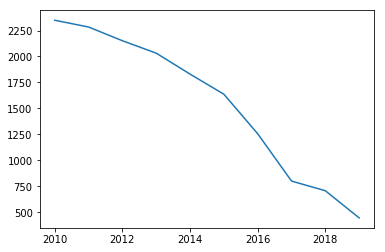

In [355]:
plt.figure()
import seaborn as sns
sns.set_style('darkgrid') 
plt.plot(range(2007,2020),returns([central[i].mean()[size1] for i in range(2006, 2014)] + [central[i].mean()[size2] for i in range(2014, 2020)]),'--o') # assuming jobs_plotting is my dataset
plt.plot(range(2007,2020),returns([north[i].mean()[size1] for i in range(2006, 2014)] + [north[i].mean()[size2] for i in range(2014, 2020)]),'--o')
plt.plot(range(2007,2020),returns([south[i].mean()[size1] for i in range(2006, 2014)] + [south[i].mean()[size2] for i in range(2014, 2020)]),'--o')
plt.plot(range(2007,2020),returns([east[i].mean()[size1] for i in range(2006, 2014)] + [east[i].mean()[size2] for i in range(2014, 2020)]),'--o')
plt.plot(range(2007,2020),returns([west[i].mean()[size1] for i in range(2006, 2014)] + [west[i].mean()[size2] for i in range(2014, 2020)]),'--o')
plt.legend(['Central','North','South','East','West'],loc=1) # loc just specifies the location of legend (1,2,3,4 are similar to quadrant position)
ax = plt.gca()
ax.axvspan(2011, 2017, alpha=0.5, color='grey')
ax.set_xlabel('Year')
ax.set_ylabel('% Change')
ax.set_title('% Change in Local Units of Employment Size 0-4')
plt.savefig('LU04.png', dpi=300)

In [31]:
def returns(arr):
    res = []
    for i in range(1, len(arr)):
        res.append(((arr[i] - arr[i-1])/arr[i-1])*100)
    return res

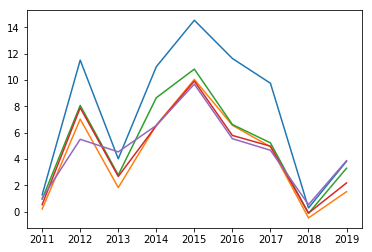

In [39]:
plt.plot(list(range(2011, 2020)), returns([east[i].mean()[size1] for i in range(2010, 2020)]))
plt.plot(list(range(2011, 2020)), returns([south[i].mean()[size1] for i in range(2010, 2020)]))
plt.plot(list(range(2011, 2020)), returns([north[i].mean()[size1] for i in range(2010, 2020)]))
plt.plot(list(range(2011, 2020)), returns([west[i].mean()[size1] for i in range(2010, 2020)]))
plt.plot(list(range(2011, 2020)), returns([central[i].mean()[size1] for i in range(2010, 2020)]))


